In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 

In [217]:
df = pd.read_csv("C:\\Users\\dhruv\\Downloads\\Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [218]:
# def binarymap(x):
#     return x.map({'yes':1,'no':0})
# df1 = df[['price','area','bedrooms','bathrooms','stories','parking']]
# df2 = df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].apply(binarymap)
# df
df = df.replace(to_replace = ['yes','no'],value = [1,0])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [219]:
train=df.sample(frac=0.8,random_state=1) 
test=df.drop(train.index)

In [220]:
train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
62,7070000,6240,4,2,2,1,0,0,0,1,1,0,furnished
247,4550000,8400,4,1,4,1,0,0,0,0,3,0,unfurnished
142,5600000,10500,4,2,2,1,0,0,0,0,1,0,semi-furnished
107,6125000,6420,3,1,3,1,0,1,0,0,0,1,unfurnished
483,2940000,6615,3,1,2,1,0,0,0,0,0,0,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,unfurnished
36,8043000,7482,3,2,3,1,0,0,1,0,1,1,furnished
30,8400000,7475,3,2,4,1,0,0,0,1,2,0,unfurnished
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished


In [221]:
test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,2590000,4400,2,1,1,1,0,0,0,0,0,0,unfurnished
513,2485000,4400,3,1,2,1,0,0,0,0,0,0,unfurnished
520,2450000,7700,2,1,1,1,0,0,0,0,0,0,unfurnished
537,1890000,1700,3,1,2,1,0,0,0,0,0,0,unfurnished


In [222]:
train = train[['price','area','bedrooms','bathrooms','stories','parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]
test = test[['price','area','bedrooms','bathrooms','stories','parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]
 #'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'

In [223]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [224]:
train

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
62,7070000,6240,4,2,2,1,1,0,0,0,1,0
247,4550000,8400,4,1,4,3,1,0,0,0,0,0
142,5600000,10500,4,2,2,1,1,0,0,0,0,0
107,6125000,6420,3,1,3,0,1,0,1,0,0,1
483,2940000,6615,3,1,2,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
359,3710000,3600,3,1,1,1,1,0,0,0,0,0
36,8043000,7482,3,2,3,1,1,0,0,1,0,1
30,8400000,7475,3,2,4,2,1,0,0,0,1,0
20,8750000,4320,3,1,2,2,1,0,1,1,0,0


In [225]:
X1_t = np.array(train.area)
X1_t

array([ 6240,  8400, 10500,  6420,  6615,  3600,  3240,  6600,  2700,
        5000,  2650,  4775,  4800,  3700,  7700,  7420,  4280,  6000,
        6600,  3649,  3420,  5500,  3630,  3180,  3600,  8400,  3000,
        8880,  5750,  2145,  6360,  6525,  1950,  5850,  8372,  2870,
        4990,  2684,  5200,  6321,  4960,  3480,  3210,  4950,  6840,
        4350,  5850,  4410,  2500,  3850,  3180,  3162,  3500,  4340,
        6440,  5010,  3000,  4920,  3760,  3816,  6000,  7000,  3640,
        4080,  4160,  2910,  6060,  3000,  2787,  4815,  4785,  6600,
        5300,  3600,  6000,  2176,  3000,  7420,  7020,  3480,  5960,
        3510,  6420,  6450,  6210,  4500,  3000,  3180,  5700,  3520,
        4040,  5800,  2800,  6480,  4960,  4260,  7500,  5880, 10500,
        4500,  3850,  8500,  3120,  3990,  4095,  4800, 13200,  7770,
        6100,  4075,  6550,  4100,  4370,  3180,  7350,  3510,  3640,
        5500,  8250,  6600,  8250,  2475,  3850,  4500,  3720,  4360,
       10240,  5500,

In [226]:
X2_t = np.array(train.bedrooms)
X3_t = np.array(train.bathrooms)
X4_t = np.array(train.stories)
X5_t = np.array(train.parking)
X6_t = np.array(train.mainroad)
X7_t = np.array(train.guestroom)
X8_t = np.array(train.hotwaterheating)
X9_t = np.array(train.airconditioning)
X10_t = np.array(train.prefarea)
X11_t = np.array(train.basement)
X0_t= np.ones(436)



In [227]:
#For test set
X = np.vstack([X0_t,X1_t,X2_t,X3_t,X4_t,X5_t,X6_t,X7_t,X8_t,X9_t,X10_t,X11_t])
X = X.T
X = np.array(X)   
X

array([[1.000e+00, 6.240e+03, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 8.400e+03, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.050e+04, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 7.475e+03, 3.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 4.320e+03, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 1.836e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [228]:
x = scaler.fit_transform(X)
X = x


In [229]:
theta = np.array([0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0.])
theta = theta.reshape(12,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [230]:
#h = np.matmul(X,theta)
Y_t = np.array(train.price)
Y = Y_t
Y = Y_t.reshape(436,1)
y = scaler.fit_transform(Y)
Y=y

In [231]:
X_T = np.array(X.T)
m,n = X.shape
print(m,n)
iterations = 1000

count=0
j = np.zeros(shape=(iterations, 1), dtype=float)
j.shape

436 12


(1000, 1)

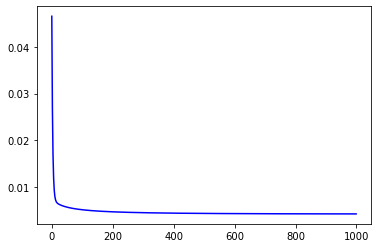

In [232]:
while(count < iterations):

    h_t = X.dot(theta)
    h = np.array(h_t,float)

    j[count]= (1/(2*m))*np.sum((h-Y)**2)

    grad_t = X_T.dot(h-Y)
    grad = grad_t*(1/m)

    theta = theta - 0.1*(grad)

    count = count + 1


plt.plot(j,'b-')


In [233]:
V_X1_t = np.array(test.area)
V_X2_t = np.array(test.bedrooms) 
V_X3_t = np.array(test.bathrooms)
V_X4_t = np.array(test.stories)
V_X5_t = np.array(test.parking)
V_X6_t = np.array(test.mainroad)
V_X7_t = np.array(test.guestroom)
V_X8_t = np.array(test.hotwaterheating)
V_X9_t = np.array(test.airconditioning)
V_X10_t = np.array(test.prefarea)
V_X11_t = np.array(test.basement)
V_X0_t = np.ones(109)

In [234]:
V_X = np.vstack([V_X0_t,V_X1_t,V_X2_t,V_X3_t,V_X4_t,V_X5_t,V_X6_t,V_X7_t,V_X8_t,V_X9_t,V_X10_t,V_X11_t])
V_X_T = V_X.T
V_X = np.array(V_X_T)
V_x = scaler.fit_transform(V_X)
V_X = V_x
V_X.shape

(109, 12)

In [235]:
V_theta = np.array([0.,0.,0.,0.,0,0.,0.,0.,0.,0.,0,0.])
V_theta = V_theta.reshape(12,1)
V_theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [236]:
# V_Y = np.array(test.price)
# V_Y.reshape(109,1)
# V_y= scaler.fit_transform([V_Y])
# V_y
V_Y_t = np.array(test.price)
V_Y = V_Y_t
V_Y = V_Y_t.reshape(109,1)
V_y = scaler.fit_transform(V_Y)
V_Y=V_y
V_Y.shape

(109, 1)

In [237]:
V_X_T = np.array(V_X.T)
m,n = V_X.shape
m,n

(109, 12)

In [238]:
iterations = 1000
count=0
V_j = np.zeros(shape=(iterations, 1), dtype=float)

while(count < iterations):

    V_h_t = V_X.dot(V_theta)
    V_h = np.array(V_h_t)


    V_j[count]= (1/(2*m))*np.sum((V_h - V_Y)**2)

    grad_t = V_X_T.dot(V_h-V_Y)
    grad = grad_t*(1/m)

    V_theta = V_theta - 0.1*(grad)

    count += 1

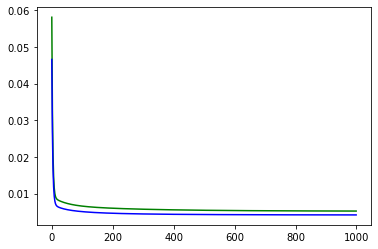

In [239]:
plt.plot(V_j,'g-')
plt.plot(j,'b-')

#BLUE == TRAINNING
#GREEN == VALIDATION